In [171]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-and-potability/water_potability.csv


# <code style="background:yellow;color:red">After To Much of Transformation and Cleaning We Are Able To Achieve 71% Accuracy using Random Forest Classifier✅✅</code>

# Data Exploration 

**With respect to the topic I think we can't remove any features because each feature seems to be important**

In [172]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [173]:
df = pd.read_csv("/kaggle/input/water-quality-and-potability/water_potability.csv")
df.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0


**Imbalanced Data**

In [174]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [175]:
df.shape

(3276, 10)

In [176]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [177]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [178]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Data Cleaning

In [180]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [181]:
df.fillna(0,inplace=True)
filter = (df.ph==0) & (df.Sulfate==0) & (df.Trihalomethanes==0)
df[filter]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
141,0.0,167.386127,20944.620814,4.963124,0.0,566.339294,11.318807,0.0,3.679795,0
201,0.0,229.771350,16162.262307,4.933662,0.0,448.846036,8.816487,0.0,4.600928,0
387,0.0,143.300200,16263.167465,6.229737,0.0,503.664085,19.585497,0.0,3.451740,1
646,0.0,221.620058,11954.700730,6.657053,0.0,391.238714,12.961433,0.0,3.282061,0
929,0.0,202.079864,12519.090660,7.627524,0.0,399.883388,12.748217,0.0,4.439215,0
992,0.0,226.765646,39942.953898,8.594715,0.0,538.621803,13.744749,0.0,4.863378,0
2065,0.0,184.993731,19764.627445,7.505092,0.0,293.477998,12.934160,0.0,3.017985,0
3062,0.0,209.531697,44982.734155,8.898024,0.0,349.385235,15.653299,0.0,3.832479,0
3067,0.0,193.091260,17777.100086,6.087949,0.0,543.114953,10.717588,0.0,3.878664,0


In [182]:
df = df[~filter]
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [183]:
mean_ph = df['ph'].mean()

# Replace the rows with 'ph' equal to zero with the mean value
df.loc[df['ph'] == 0, 'ph'] = mean_ph

In [184]:
mean_Sulfate = df['Sulfate'].mean()
df.loc[df['Sulfate']==0,'Sulfate'] = mean_Sulfate

In [185]:
mean_Trihalomethanes = df['Trihalomethanes'].mean()
df.loc[df['Trihalomethanes']==0,'Trihalomethanes'] = mean_Trihalomethanes

**Above I used a trick : first I converted all the NaN values to zero then removed all the values where ph,sulfate and Trihalomethanes are zero at same time and then replaced those zero values with mean value**

# Exploratory Data Analysis (EDA) 

**Boxplot**

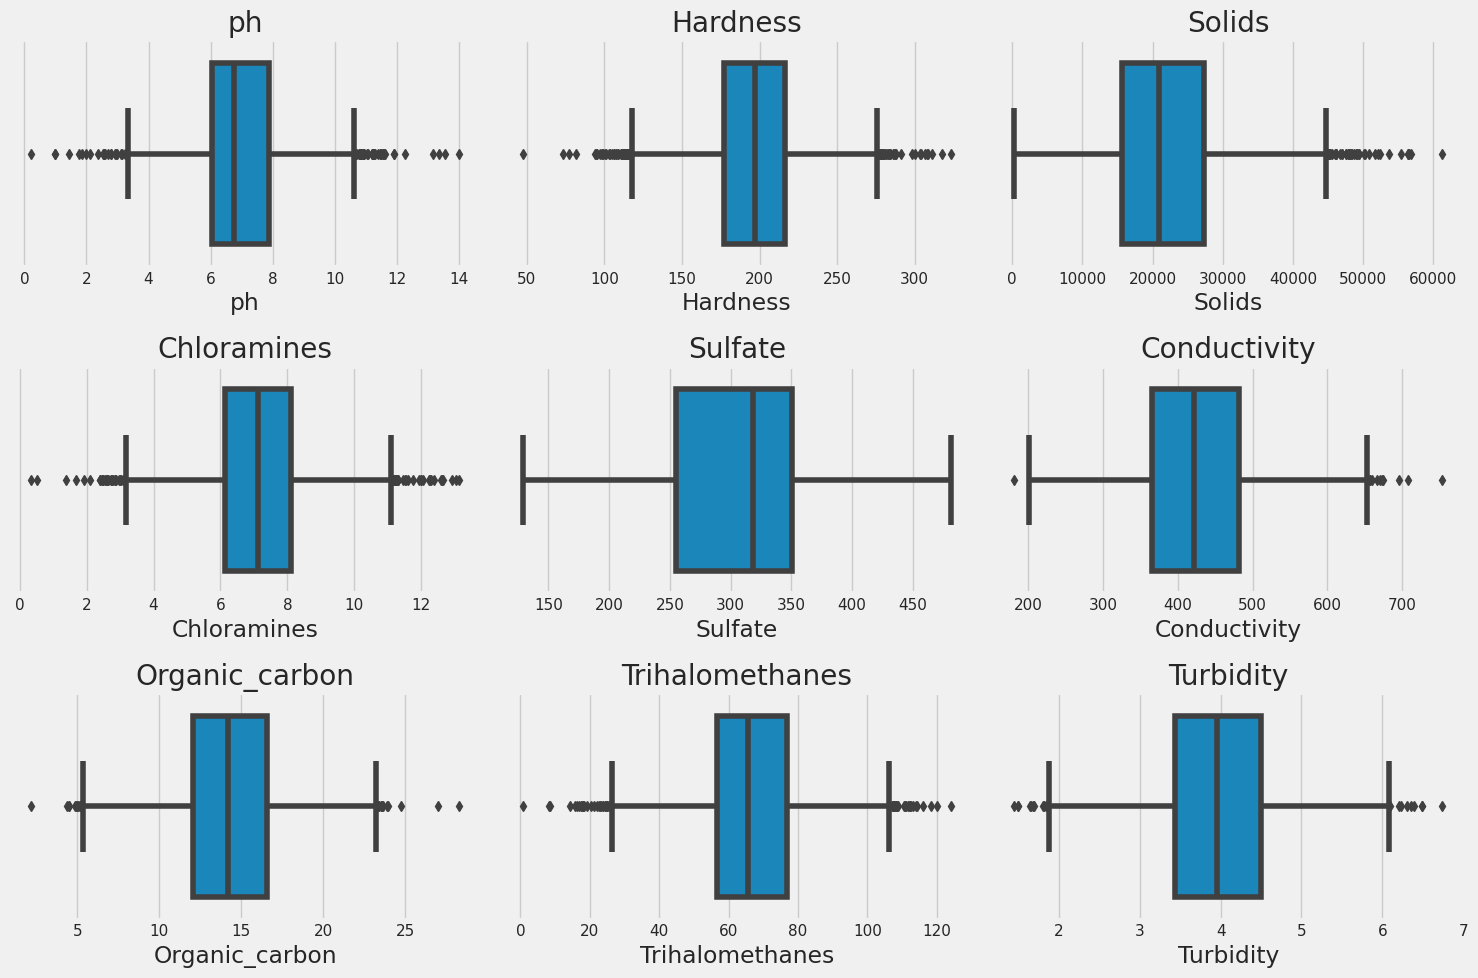

In [186]:

parameters = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
plt.figure(figsize=(15, 10))

for i, parameter in enumerate(parameters):
    plt.subplot(3, 3, i % 9 + 1)  # Adjust the 3x3 grid layout
    sns.boxplot(x=df[parameter])
    plt.title(parameter)
    
    if i % 3 == 2 or i == len(parameters) - 1:
        plt.tight_layout()

plt.show()


**All features are equally correlated**

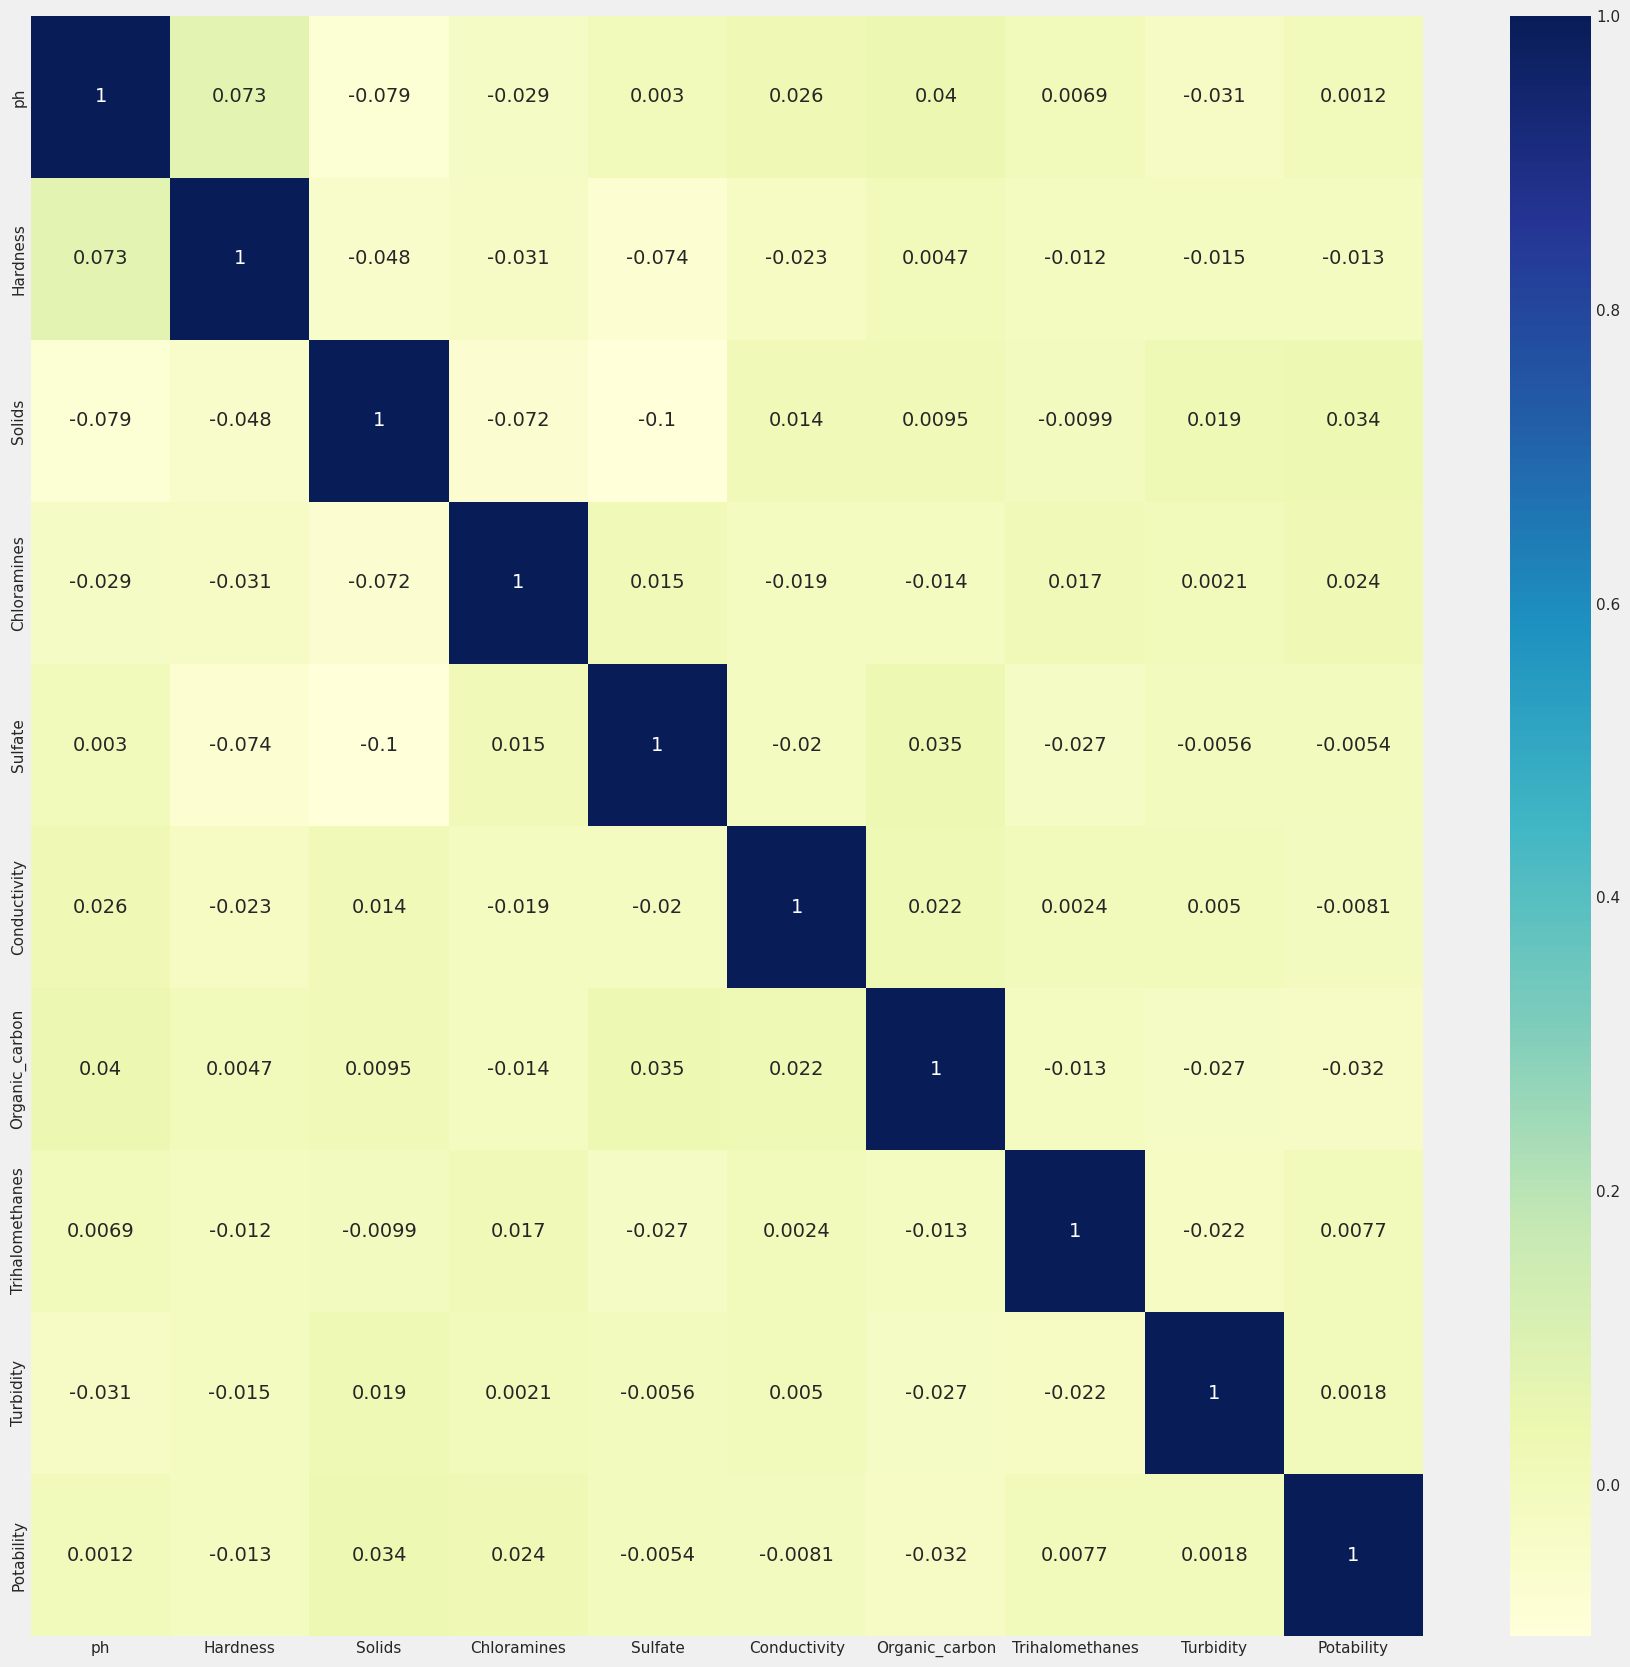

In [187]:
figure = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [188]:
import plotly.graph_objects as go

ph_potable = df[df['Potability'] == 1]['ph']
ph_non_potable = df[df['Potability'] == 0]['ph']

def create_hist(ph_potable, ph_non_potable,title):
    trace2 = go.Histogram(
        x=ph_potable,
        opacity=0.75,
        name='Potable',
        marker=dict(color='green')
    )

    trace1 = go.Histogram(
        x=ph_non_potable,
        opacity=0.75,
        name='Non-Potable',
        marker=dict(color='red')
    )

    layout = go.Layout(barmode='overlay', title_text=f'{title} Histogram by Potability', xaxis=dict(title=f'{title}'), yaxis=dict(title='Frequency'))
    data = [trace1, trace2]
    fig = go.Figure(data=data, layout=layout)
    return fig

create_hist(ph_potable, ph_non_potable,"pH")

In [189]:
ph_potable = df[df['Potability'] == 1]['Hardness']
ph_non_potable = df[df['Potability'] == 0]['Hardness']
create_hist(ph_potable, ph_non_potable,"Hardness")

In [190]:
ph_potable = df[df['Potability'] == 1]['Sulfate']
ph_non_potable = df[df['Potability'] == 0]['Sulfate']
create_hist(ph_potable,ph_non_potable,"Sulfate")

### Perfect Sulphates Range between 250 to 400

In [191]:
ph_potable = df[df['Potability'] == 1]['Conductivity']
ph_non_potable = df[df['Potability'] == 0]['Conductivity']
create_hist(ph_potable,ph_non_potable,"Conductivity")

In [192]:
ph_potable = df[df['Potability'] == 1]['Organic_carbon']
ph_non_potable = df[df['Potability'] == 0]['Organic_carbon']
create_hist(ph_potable,ph_non_potable,"Organic_carbon")

In [193]:
ph_potable = df[df['Potability'] == 1]['Turbidity']
ph_non_potable = df[df['Potability'] == 0]['Turbidity']
create_hist(ph_potable,ph_non_potable,"Turbidity")

**Striclty we can see the data is imbalanced as well as overlapping**

# Removing Outliers

**Below Converts Decimal Value to Int64 with Rounding Each value its nearest value eg: 3.9 to 4**

In [194]:
for cols in df.columns: 
    if cols!="Potability":
        df[cols] = df[cols].round().astype('int64')

df.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,255,593,15,56,5,0
2,8,224,19910,9,255,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


**Below Is the Code Remove SPECIFIC Outliers Values from Main Dataframe**

In [196]:
# finding outliers data
Q1 = df['Hardness'].quantile(0.25)
Q3 = df['Hardness'].quantile(0.75)
IQR = Q3-Q1
# identify outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['Hardness']<lower_bound) | (df['Hardness']>upper_bound)]
values_out_of_range = df[(df['Hardness']<Q1) | (df['Hardness']>Q3)]
outliers_df = pd.DataFrame(outliers)

df = df.drop(outliers_df.index)
df.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,255,593,15,56,5,0
2,8,224,19910,9,255,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


In [197]:
# finding outliers data
Q1 = df['Trihalomethanes'].quantile(0.25)
Q3 = df['Trihalomethanes'].quantile(0.75)
IQR = Q3-Q1
# identify outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['Trihalomethanes']<lower_bound) | (df['Trihalomethanes']>upper_bound)]
values_out_of_range = df[(df['Trihalomethanes']<Q1) | (df['Trihalomethanes']>Q3)]
outliers_df = pd.DataFrame(outliers)

df = df.drop(outliers_df.index)
df.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,255,593,15,56,5,0
2,8,224,19910,9,255,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


In [198]:
# finding outliers data
Q1 = df['Solids'].quantile(0.25)
Q3 = df['Solids'].quantile(0.75)
IQR = Q3-Q1
# identify outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['Solids']<lower_bound) | (df['Solids']>upper_bound)]
values_out_of_range = df[(df['Solids']<Q1) | (df['Solids']>Q3)]
outliers_df = pd.DataFrame(outliers)

df = df.drop(outliers_df.index)
df.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,255,593,15,56,5,0
2,8,224,19910,9,255,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


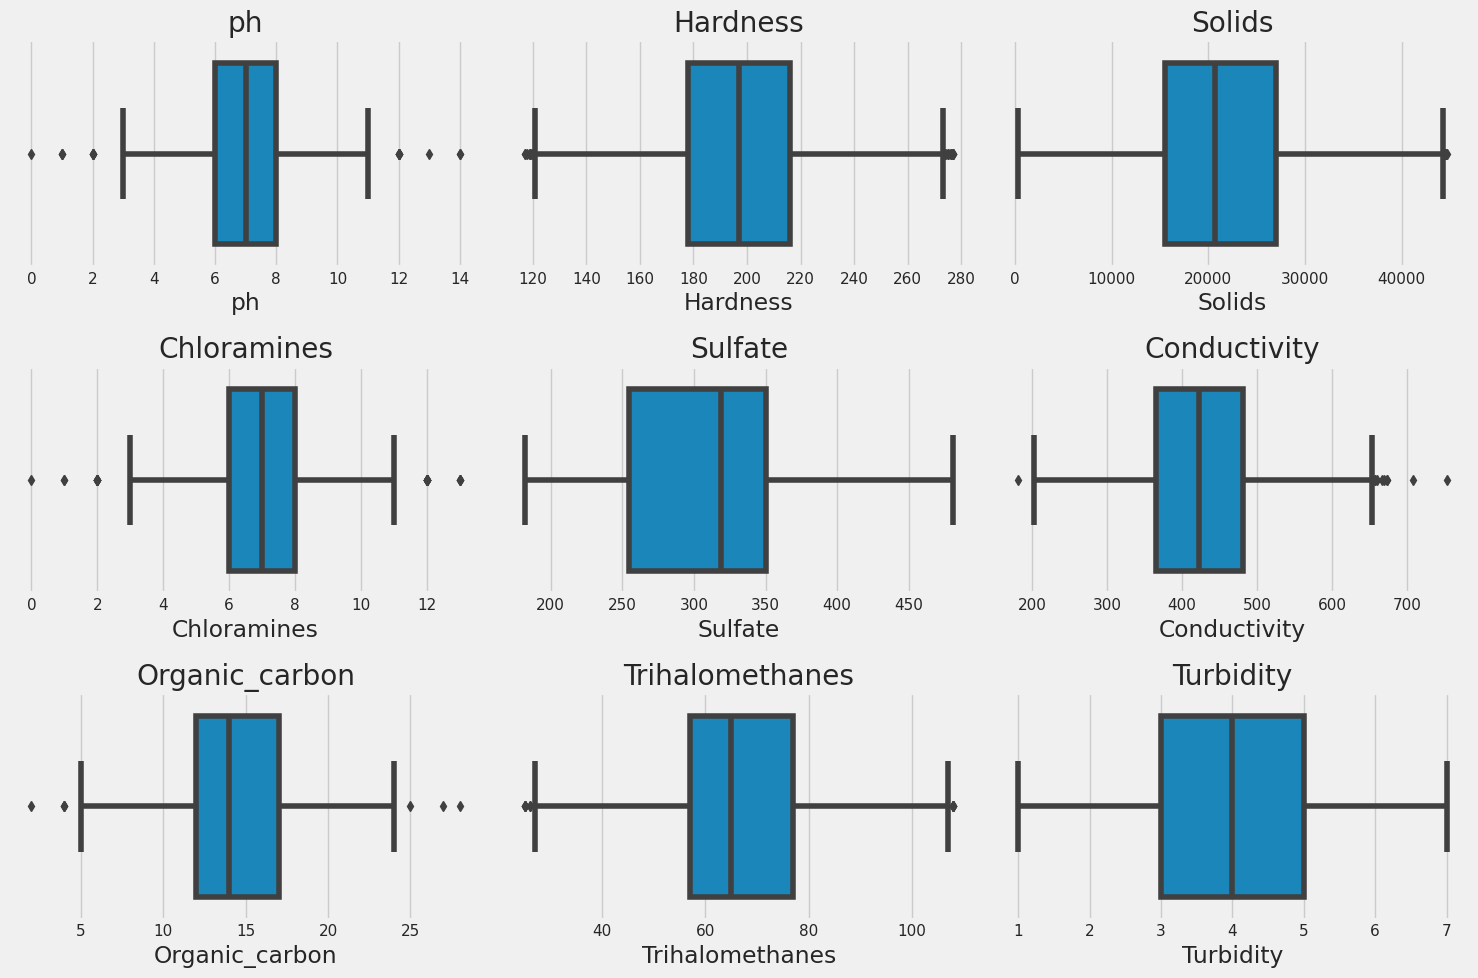

In [199]:

parameters = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
plt.figure(figsize=(15, 10))

for i, parameter in enumerate(parameters):
    plt.subplot(3, 3, i % 9 + 1)  # Adjust the 3x3 grid layout
    sns.boxplot(x=df[parameter])
    plt.title(parameter)
    
    if i % 3 == 2 or i == len(parameters) - 1:
        plt.tight_layout()

plt.show()


**Cleared all Outliers from Features : Hardness,Trihalomethanes and Solids**

In [200]:
df.shape

(3113, 10)

## **Compare Boxplots We can clearly see the difference after removing outliers**

# Spliting Data and Model Building

In [201]:
X = df.drop('Potability', axis=1)
y = df['Potability']

## SMOTE (Synthetic Minority Over-sampling Technique)

**SMOTE** : SMOTE is an data balancing technique used during binary classification. It tackles imbalance data problem by generating synthetic samples for minority class. 


**So here our minority class is value : 1**

In [202]:
y.value_counts()

Potability
0    1916
1    1197
Name: count, dtype: int64

In [203]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

# Fit and apply the transform
X_resampled, y_resampled = sm.fit_resample(X, y)

In [204]:
y_resampled.value_counts()

Potability
0    1916
1    1916
Name: count, dtype: int64

# Test Train Split

In [231]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20)

In [232]:
X.shape,y.shape

((3113, 9), (3113,))

In [233]:
print(X_train.head(4))
print(X_test.head(4))

      ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
2868   7       154   21103            8      376           450   
1887   8       224   20260            7      351           510   
490    4       149   26640            9      317           366   
1453   7       203    1372           11      476           361   

      Organic_carbon  Trihalomethanes  Turbidity  
2868              15               71          4  
1887              14               73          5  
490               13               54          3  
1453              17               55          3  
      ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
3026   7       180   34452            8      304           430   
2008  11       144   31320            8      403           491   
452    6       192   26854            9      312           376   
3447   7       172   39207            8      313           497   

      Organic_carbon  Trihalomethanes  Turbidity  
3026               8            

In [234]:
print(y_train.value_counts())
print(y_test.value_counts())

Potability
1    1536
0    1529
Name: count, dtype: int64
Potability
0    387
1    380
Name: count, dtype: int64


**Logistic Regression doesn't work good with outliers**

In [235]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.5058670143415906
Confusion Matrix : 
[[193 194]
 [185 195]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.51      0.50      0.50       387
           1       0.50      0.51      0.51       380

    accuracy                           0.51       767
   macro avg       0.51      0.51      0.51       767
weighted avg       0.51      0.51      0.51       767



In [236]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.5501955671447197
Confusion Matrix : 
[[194 193]
 [152 228]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       387
           1       0.54      0.60      0.57       380

    accuracy                           0.55       767
   macro avg       0.55      0.55      0.55       767
weighted avg       0.55      0.55      0.55       767



In [237]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.621903520208605
Confusion Matrix : 
[[247 140]
 [150 230]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       387
           1       0.62      0.61      0.61       380

    accuracy                           0.62       767
   macro avg       0.62      0.62      0.62       767
weighted avg       0.62      0.62      0.62       767



**Bagging**

In [238]:
rd_clf = RandomForestClassifier(criterion = "entropy")
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.7183833116036505
Confusion Matrix : 
[[289  98]
 [118 262]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       387
           1       0.73      0.69      0.71       380

    accuracy                           0.72       767
   macro avg       0.72      0.72      0.72       767
weighted avg       0.72      0.72      0.72       767



**Ensemble Technique**

In [239]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.6375488917861799
Confusion Matrix : 
[[259 128]
 [150 230]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       387
           1       0.64      0.61      0.62       380

    accuracy                           0.64       767
   macro avg       0.64      0.64      0.64       767
weighted avg       0.64      0.64      0.64       767



In [240]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.6857887874837028
Confusion Matrix : 
[[273 114]
 [127 253]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       387
           1       0.69      0.67      0.68       380

    accuracy                           0.69       767
   macro avg       0.69      0.69      0.69       767
weighted avg       0.69      0.69      0.69       767



In [241]:
cat = CatBoostClassifier(iterations=50)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)
print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Learning rate set to 0.259229
0:	learn: 0.6832633	total: 1.44ms	remaining: 70.4ms
1:	learn: 0.6766978	total: 2.73ms	remaining: 65.5ms
2:	learn: 0.6685976	total: 3.97ms	remaining: 62.2ms
3:	learn: 0.6641245	total: 5.84ms	remaining: 67.1ms
4:	learn: 0.6576826	total: 7.02ms	remaining: 63.2ms
5:	learn: 0.6532548	total: 8.26ms	remaining: 60.6ms
6:	learn: 0.6494936	total: 9.46ms	remaining: 58.1ms
7:	learn: 0.6461916	total: 10.5ms	remaining: 55.1ms
8:	learn: 0.6415253	total: 11.8ms	remaining: 53.9ms
9:	learn: 0.6322482	total: 13ms	remaining: 52.1ms
10:	learn: 0.6285036	total: 14.1ms	remaining: 49.9ms
11:	learn: 0.6251634	total: 15.1ms	remaining: 47.7ms
12:	learn: 0.6232368	total: 16ms	remaining: 45.7ms
13:	learn: 0.6169529	total: 17.2ms	remaining: 44.2ms
14:	learn: 0.6104067	total: 18.3ms	remaining: 42.6ms
15:	learn: 0.6061559	total: 19.4ms	remaining: 41.2ms
16:	learn: 0.6032942	total: 20.4ms	remaining: 39.7ms
17:	learn: 0.6017827	total: 21.4ms	remaining: 38.1ms
18:	learn: 0.5982996	total: 22

In [242]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier', 'XgBoost', 'Cat Boost'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_xgb, acc_cat]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.718383
5,XgBoost,0.685789
6,Cat Boost,0.653194
4,Ada Boost Classifier,0.637549
2,Decision Tree Classifier,0.621904
1,KNN,0.550196
0,Logistic Regression,0.505867


In [243]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly', title = 'Models Comparison')

**Thank you!**